# Abstract

In this work, we take a look at the applications of DFT. We explore the possibility of the samples of the periodic function being sampled such that non integral periods are captured. This of course leads to discontinuities in the function which amounts to delta components which have all frequencies which cause spectral leakage.

# Introduction 

In the following work we look at spectral leakage caused due to improper sampling of the function which causes non integral periods to be captured leading to abrupt discontinuities in the function which are essentially $\delta(t)$ components or equivalently $u(t) components. These contribute to multiple frequencies being present and consequently ruin the spectrum. This is of course remedied by windowing- the operation of multiplying a function with another suitable function to reduce the effect of jumps.

In this we'll essentially use the (N point) Hamming window given by
\begin{equation}
H(n)= 0.54 + 0.46\cos(\frac{n}{N-1})
\end{equation}
where n varies from 0 to N-1.



# Code and Method-

First, we make the necessary imports to complete the task at hand.

In [1]:


from pylab import *
from __future__ import division
% matplotlib inline
import sys
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 18})
import scipy.signal as sp
from sympy import *
init_session
size=(10,8)
import mpl_toolkits.mplot3d.axes3d as p3

Here we define a few helper functions.

In [2]:

def plotfigure(figsize,xlabel,ylabel,title,x,y,style="k-",graph="plot"):
    plt.figure(figsize=figsize)
    plt.grid(True)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    if graph=="plot":
        plt.plot(x,y,style)
    if graph== "semilogx":
        plt.semilogx(x,y,style)
    if graph== "semilogy":
        plt.semilogy(x,y,style)
    if graph== "loglog":
        plt.loglog(x,y,style)
    plt.tight_layout()
    plt.show()
    plt.close()
    
def func(t):
    return sin(sqrt(2)*t)

def func2(t):
    return (cos(0.86*t))**3

def chirp(t):
    return cos(16*t*(1.5+(t/(2*pi))))

def hamming(n):
    return (0.54+0.46*cos((2*np.pi*arange(n))/(n-1)))



The function we consider here is $sin(\sqrt{2}t)$ and consider the time interval $\left(-\pi,\pi\right)$. Because we want the phase to be purely imaginary, we set the value corresponding to $-t_{max}$ to zero. However, we get a very dissatisfactory plot due to lack of windowing.

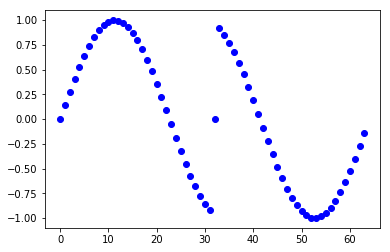

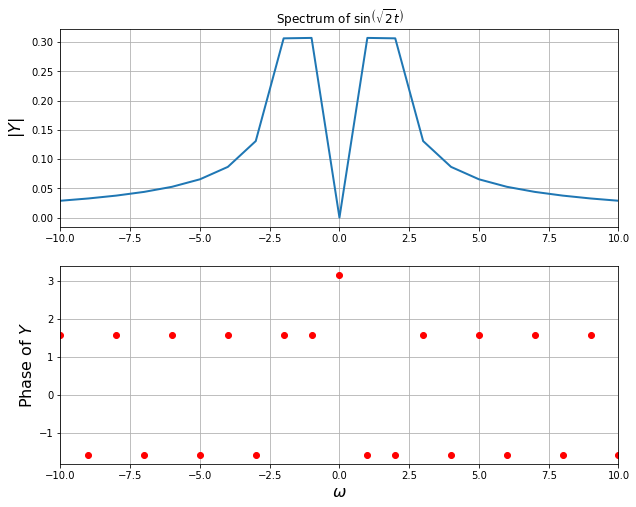

In [3]:

# plottng the worong dft 
from pylab import *
t1= linspace(-pi,pi,65); t1= t1[:-1]
t2= linspace(-3*pi,-pi,65); t2= t2[:-1]
t3= linspace(pi,3*pi,65); t3= t3[:-1]
dt = t1[1]-t1[0]
fmax= 1/dt
y= func(t1)
y[0]=0
Y= fftshift(fft(fftshift(y)))/64
plt.plot(fftshift(y),"bo")
#contiuous time omega 
w= linspace(-pi*fmax,pi*fmax,65)[:-1]
# first and second argument- continous time sampling
# third argument- N point DFT
figure(figsize=(10,8))
subplot(2,1,1)
plot(w,abs(Y),lw=2)
xlim([-10,10])
ylabel(r"$|Y|$",size=16)
title(r"Spectrum of $\sin\left(\sqrt{2}t\right)$")
grid(True)
subplot(2,1,2)
plot(w,angle(Y),"ro",lw=2)
xlim([-10,10])
ylabel(r"Phase of $Y$",size=16)
xlabel(r"$\omega$",size=16)
grid(True)
show()

The following is a plot of the function in the continuous time domain. As expected, it is continuous.

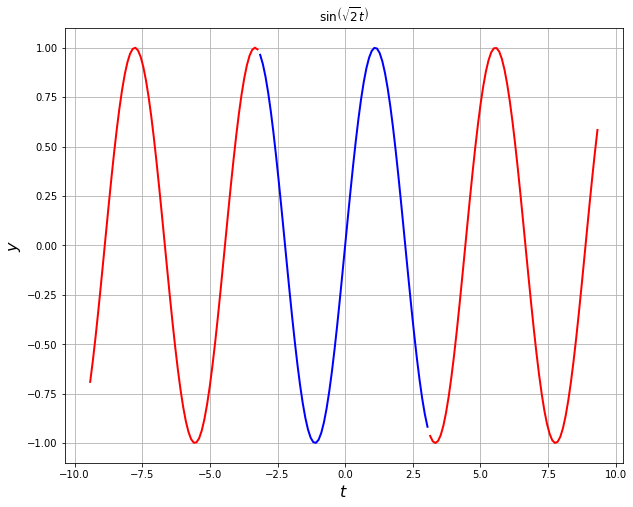

In [4]:

# understanding what went wrong

figure(figsize=(10,8))
plot(t1,func(t1),"b",lw=2)
plot(t2,func(t2),"r",lw=2)
plot(t3,func(t3),"r",lw=2)
ylabel(r"$y$",size=16)
xlabel(r"$t$",size=16)
title(r"$\sin\left(\sqrt{2}t\right)$")
grid(True)

show()



This is where the sampling kicks in. The duration chosen is not an integral multiple of the period and thus when extended periodically (which is what the DFT analyses) produces a function with jumps. 

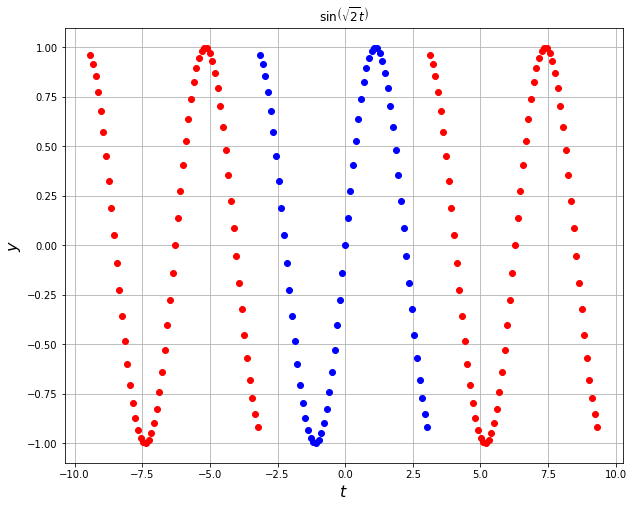

In [5]:

# function being analysed by DFT
figure(figsize=(10,8))
plot(t1,func(t1),"bo",lw=2)
plot(t2,func(t1),"ro",lw=2)
plot(t3,func(t1),"ro",lw=2)
ylabel(r"$y$",size=16)
xlabel(r"$t$",size=16)
title(r"$\sin\left(\sqrt{2}t\right)$")
grid(True)
savefig("fig10-2.png")
show()

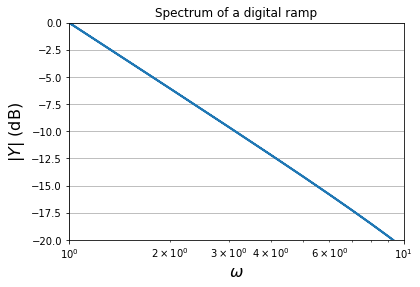

In [6]:
y=t1
y[0]=0 # the sample corresponding to -tmax should be set zeroo
y=fftshift(y) # make y start with y(t=0)
Y=fftshift(fft(y))/64.0
w=linspace(-pi*fmax,pi*fmax,65);w=w[:-1]
figure()
semilogx(abs(w),20*log10(abs(Y)),lw=2)
xlim([1,10])
ylim([-20,0])
ylabel(r"$|Y|$ (dB)",size=16)
title(r"Spectrum of a digital ramp")
xlabel(r"$\omega$",size=16)
grid(True)
show()

By windowing, we essentially supress the jumps at the edges and thus can approach the function desired.

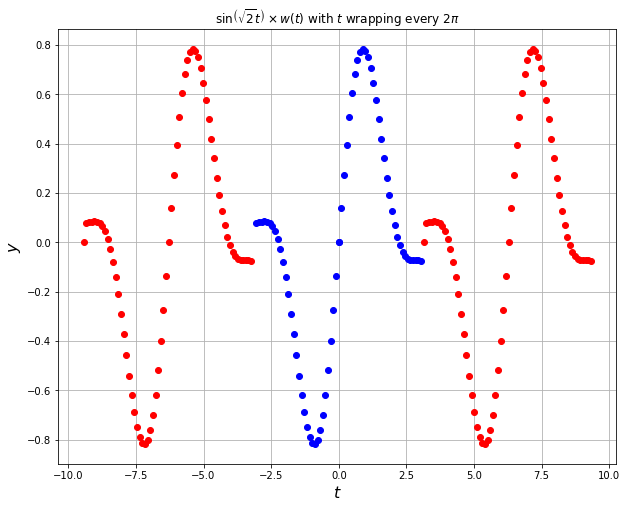

In [7]:

# we begin to window
window= fftshift(0.54+0.46*cos((2*pi*arange(64))/63))
y=func(t1)*window
figure(figsize= (10,8))
plot(t1,y,"bo",lw=2)
plot(t2,y,"ro",lw=2)
plot(t3,y,"ro",lw=2)
ylabel(r"$y$",size=16)
xlabel(r"$t$",size=16)
title(r"$\sin\left(\sqrt{2}t\right)\times w(t)$ with $t$ wrapping every $2\pi$ ")
grid(True)
show()

The windowed function provides a desirable spectrum that lacks in resolution due to insufficient number of points. 

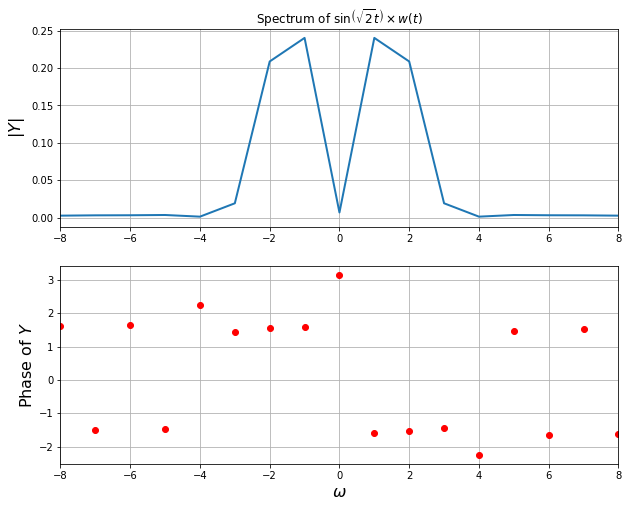

In [8]:
y[0]=0
Y=fftshift(fft(fftshift(y)))/64
w=linspace(-pi*fmax,pi*fmax,65)[:-1]
figure(figsize=(10,8))
subplot(2,1,1)
plot(w,abs(Y),lw=2)
xlim([-8,8])
ylabel(r"$|Y|$",size=16)
title(r"Spectrum of $\sin\left(\sqrt{2}t\right)\times w(t)$")
grid(True)
subplot(2,1,2)
plot(w,angle(Y),"ro",lw=2)
xlim([-8,8])
ylabel(r"Phase of $Y$",size=16)
xlabel(r"$\omega$",size=16)
grid(True)
show()


Time frequency resolution is improved by considering a larger time interval increasing the number of points proportionate to increase only the net number of points 

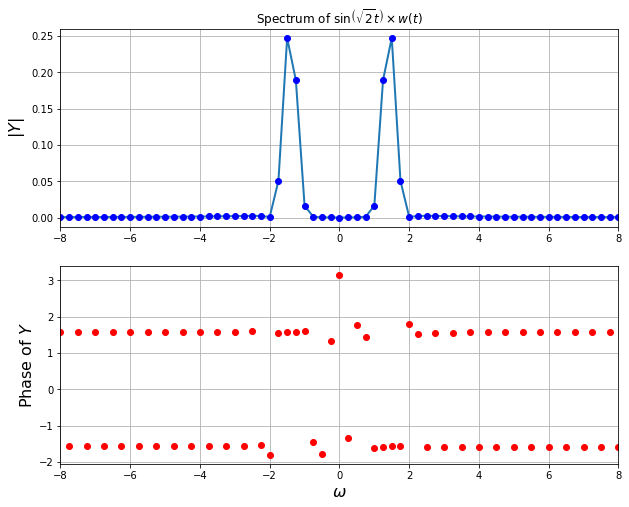

In [9]:
t4= linspace(-4*pi, 4*pi, 257)[:-1]
y= func(t4)
y[0]=0
window= fftshift(0.54+0.46*cos((2*pi*arange(256))/255))
y=window*y
Y=fftshift(fft(fftshift(y)))/256
w=linspace(-pi*fmax,pi*fmax,257)[:-1]
figure(figsize=(10,8))
subplot(2,1,1)
plot(w,abs(Y),lw=2)
plot(w,abs(Y),"bo")
xlim([-8,8])
ylabel(r"$|Y|$",size=16)
title(r"Spectrum of $\sin\left(\sqrt{2}t\right)\times w(t)$")
grid(True)
subplot(2,1,2)
plot(w,angle(Y),"ro",lw=2)
xlim([-8,8])
ylabel(r"Phase of $Y$",size=16)
xlabel(r"$\omega$",size=16)
grid(True)
show()


Next we look at the function $\cos^{3}(0.86t)$. This has components at $\omega= 0.86$ and at $\omega= 2.64$. Thus, it is expected to have four peaks in all. The DFT is obtained both with and without windowing. From the obtained spectrum it is evident that we require greater resolution in the frequency domain and thus require greater interval and correspondingly higher number of points.

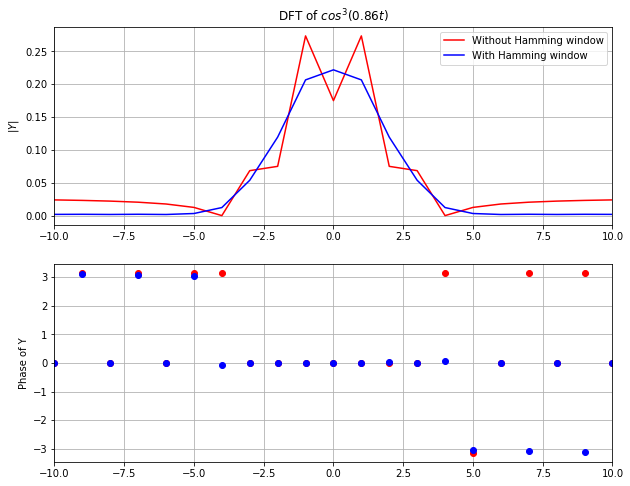

In [10]:
y1= func2(t1)
y1= fftshift(y1)
Y1= fftshift(fft(y1))/64
# repeating the same for cos cube of 0.86t
window= (0.54+0.46*cos((2*pi*arange(64))/63))
window= fftshift(window)
y2= window*func2(t1)
y2= fftshift(y2)
Y2= fftshift(fft(y2))/64
w= linspace(-pi*fmax,pi*fmax,65)[:-1]
figure(figsize=(10,8))
subplot(2,1,1)
title("DFT of $cos^3(0.86t)$")
plot(w,abs(Y1),"r",label="Without Hamming window")
ylabel("$|Y|$")
plot(w,abs(Y2),"b", label="With Hamming window")
xlim([-10,10])
legend()
grid(True)
subplot(2,1,2)
plot(w,angle(Y1),"ro", label="Without Hamming window")
ylabel("Phase of Y")
plot(w,angle(Y2),"bo", label="With Hamming window")
xlim([-10,10])
grid(True)

(-10, 10)

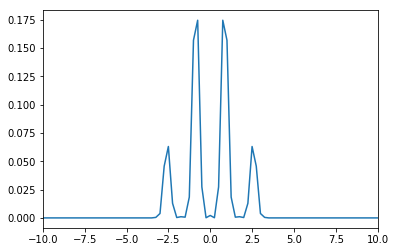

In [11]:

# repeating the same for cos cube of 0.86t with more points
window=  (0.54+0.46*cos((2*pi*arange(256))/255))
window= fftshift(window)
y= window*func2(t4)
y= fftshift(y)
Y= fftshift(fft(y))/256
w= linspace(-pi*fmax,pi*fmax,257)[:-1]
figure()
plot(w,abs(Y))
xlim([-10,10])

With sufficient number of points the peaks become quite distinct. It is also evident that the windowing process makes things much better for the spectrum. Further, the peaks also occur at the expected values. However, it is worth noting that the ouput is smeared out due to windowing.

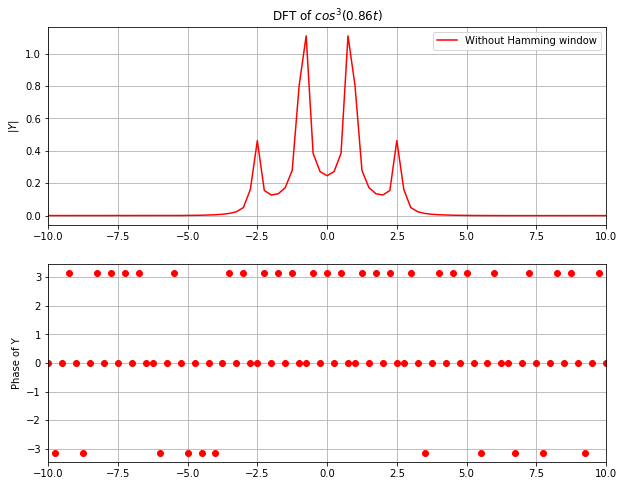

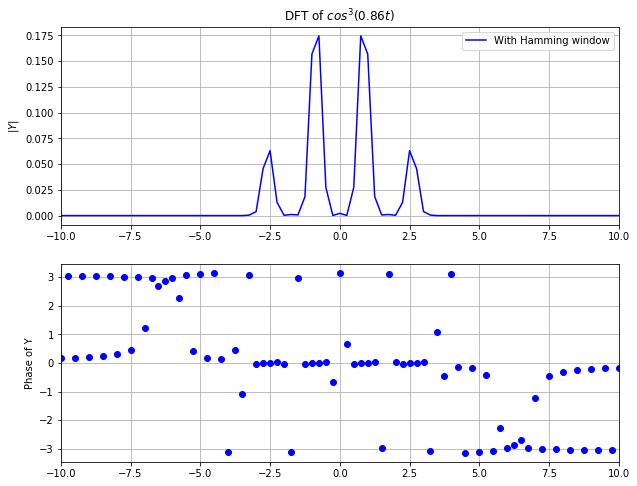

In [12]:

y1= func2(t4)
y1= fftshift(y1)
Y1= fftshift(fft(y1))/64
# repeating the same for cos cube of 0.86t
window= (0.54+0.46*cos((2*pi*arange(256))/255))
window= fftshift(window)
y2= window*func2(t4)
y2= fftshift(y2)
Y2= fftshift(fft(y2))/256
w= linspace(-pi*fmax,pi*fmax,257)[:-1]
figure(figsize=(10,8))
subplot(2,1,1)
title("DFT of $cos^3(0.86t)$")
plot(w,abs(Y1),"r",label="Without Hamming window")
ylabel("$|Y|$")
xlim([-10,10])
legend()
grid(True)
subplot(2,1,2)
plot(w,angle(Y1),"ro", label="Without Hamming window")
ylabel("Phase of Y")
xlim([-10,10])
grid(True)

figure(figsize=(10,8))
subplot(2,1,1)
title("DFT of $cos^3(0.86t)$")
ylabel("$|Y|$")
plot(w,abs(Y2),"b", label="With Hamming window")
xlim([-10,10])
legend()
grid(True)
subplot(2,1,2)
ylabel("Phase of Y")
plot(w,angle(Y2),"bo", label="With Hamming window")
xlim([-10,10])
grid(True)

The chirp signal is plotted for the sake of visualisation. 

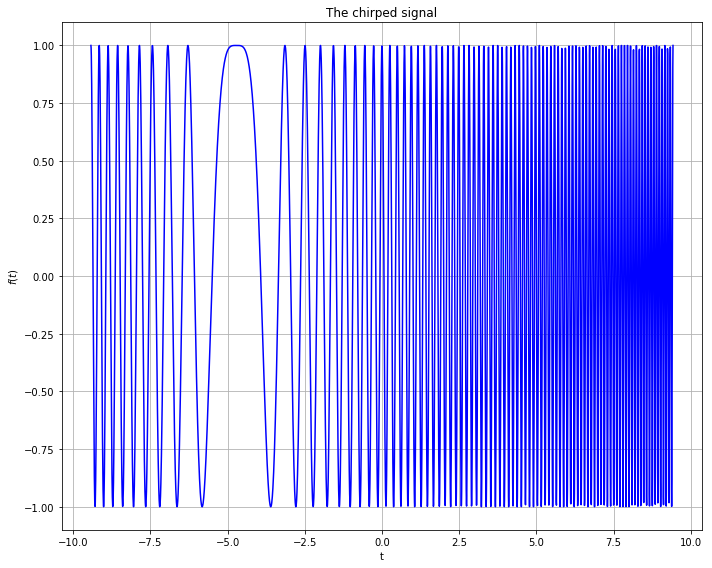

In [13]:

n=linspace(-3*pi,3*pi,3072)
plotfigure((10,8),"t","$f(t)$","The chirped signal",n,chirp(n),"b")

The same DFT procedure is performed for the chirped signal and  a comparision is made of the DFTs obained by the windowed and non windowed waveforms. It can be shown that windowing operations considerably distort the chirp signal and consequently it is better to model in the time domain. That being said, further analysis will be performed only with the non-windowed waveform. However, on modification, the well known bell waveform is obtained.

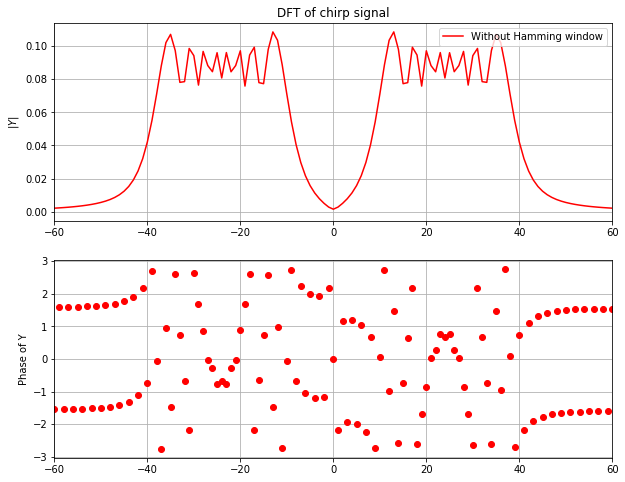

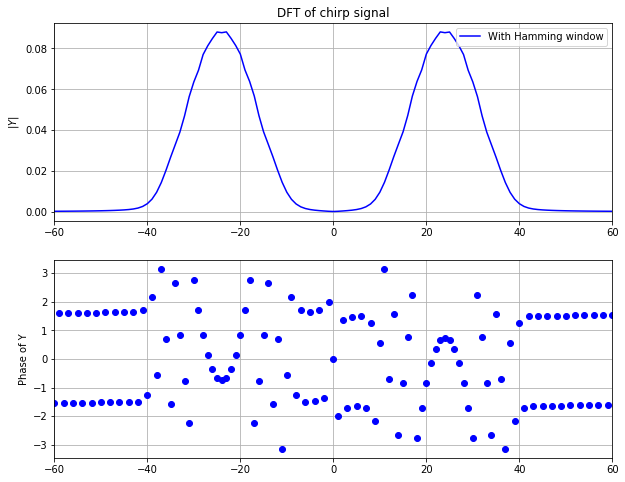

In [14]:
t= linspace(-pi,pi,1025)[:-1]
fmax=1/(t[1]-t[0])
window= fftshift(0.54+0.46*cos((2*pi*arange(1024))/1023))

y1= chirp(t)
Y1=fftshift(fft(fftshift(y1)))/1024
w=linspace(-pi*fmax,pi*fmax,1025)[:-1]
y2=y1*window
Y2=fftshift(fft(fftshift(y2)))/1024

figure(figsize=(10,8))
subplot(2,1,1)
title("DFT of chirp signal")
plot(w,abs(Y1),"r",label="Without Hamming window")
ylabel("$|Y|$")
xlim([-60,60])
legend(loc=1)
grid(True)
subplot(2,1,2)
plot(w,angle(Y1),"ro", label="Without Hamming window")
ylabel("Phase of Y")
xlim([-60,60])
grid(True)

figure(figsize=(10,8))
subplot(2,1,1)
title("DFT of chirp signal")
ylabel("$|Y|$")
plot(w,abs(Y2),"b", label="With Hamming window")
xlim([-60,60])
legend(loc=1)
grid(True)
subplot(2,1,2)
ylabel("Phase of Y")
plot(w,angle(Y2),"bo", label="With Hamming window")
xlim([-60,60])
grid(True)




In the following piece of code, we attempt to plot a spectrogram or a time frequency plot of the given signal by breaking up the 1024 sized vector into 16 bins. We take FFT of each of these bins and then plot a 3D surface plot.

(64, 16)


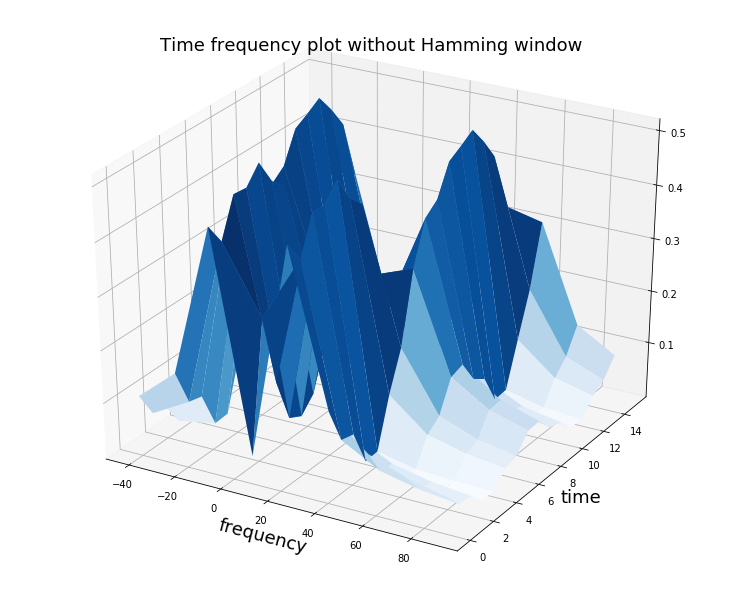

In [15]:

# finding DFT
# reshape the non windowed function
y1= y1.reshape(1024//64,64 )
Y1=fftshift(fft(fftshift(y1)))/64
w=linspace(-pi*fmax,pi*fmax,64)
# print (Y1.shape)
fig4=plt.figure(4,figsize=(10,8)) # open a new figure
ax=p3.Axes3D(fig4) # Axes3D is the means to do a surface plot
plt.title("Time frequency plot without Hamming window", fontsize=18)
plt.xlabel("frequency",fontsize=18)
plt.ylabel("time",fontsize=18)
plt.grid(True)
x,y=np.meshgrid(arange(16),w)
# print (x.shape)
# print (y.shape)
# print ()
# Y1[where(abs(y.T)>100)]=-100
surf = ax.plot_surface(y.T[:,29:38],x.T[:,29:38],abs(Y1[:,29:38]), rstride=1, 
                       cstride=1, cmap= cm.Blues,linewidth=0,alpha=1)
# #xlim([-100,100])
# print((y.T[:,25:40]).shape)
# print((Y1[:,25:40]).shape)
print(y.shape)

To understand the variation in peaks, we plot a contour plot

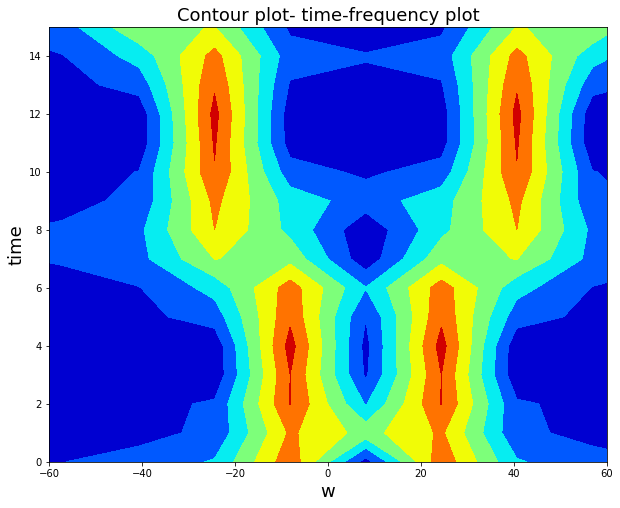

In [16]:
figure(figsize=(10,8))
title("Contour plot- time-frequency plot",fontsize=18)
xlabel("w",fontsize=18)
ylabel("time",fontsize=18)
xlim([-60,60])
contourf(y.T,x.T,abs(Y1),cmap=cm.jet)
plt.show()

0.5122277051633387
0.5122277051633387
1.2040217957366757
0.8559215600797823


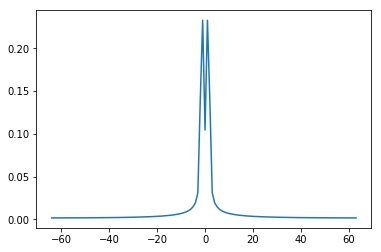

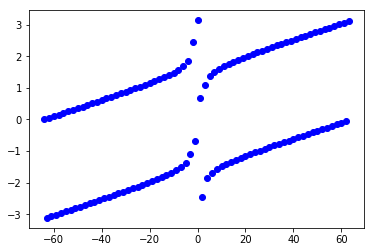

In [17]:

w= random()+0.5
p= random()
t= linspace(-pi,pi,129)[:-1]
fmax= 1/(t[1]-t[0])
y= cos(w*t+p)
window= hamming(128)
window= fftshift(window)
y1= y*window
Y= fftshift(fft(fftshift(y1)))/128
w1= linspace(-pi*fmax,pi*fmax,129)[:-1]
plot(w1,abs(Y))
figure()
plot(w1,angle(Y),"bo")
guessw= np.sum(abs(w1[where((abs(Y)>5e-2))])*abs(Y[where((abs(Y)>5e-2))]))/np.sum(abs(Y[where((abs(Y)>5e-2))]))
guessd= np.average((arccos(y)-guessw*t)[where(abs(Y)>5e-2)])
print(p)
print(guessd)
print(guessw)
print(w)


0.12919297215861214
nan
1.3333333333333357
0.5338563899488208


/home/milind/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in arccos
  from ipykernel import kernelapp as app


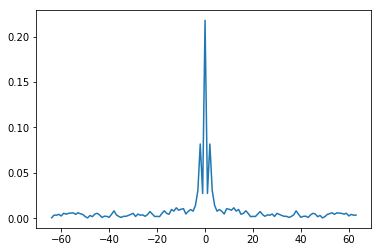

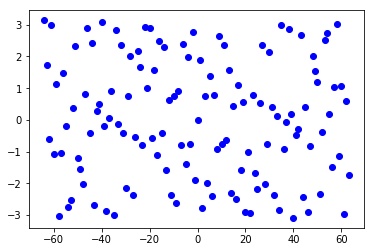

In [18]:
w= random()+0.5
p= random()
t= linspace(-pi,pi,129)[:-1]
fmax= 1/(t[1]-t[0])
y= cos(w*t+p)+0.1*randn(128)
window= hamming(128)
window= fftshift(window)
y1= y*window
Y= fftshift(fft(fftshift(y1)))/128
w1= linspace(-pi*fmax,pi*fmax,129)[:-1]
plot(w1,abs(Y))
figure()
plot(w1,angle(Y),"bo")
guessw= np.average(abs(w1[where((abs(Y)>5e-2))]))
guessd= np.average((arccos(y)-guessw*t)[where(abs(Y)>5e-2)])
print(p)
print(guessd)
print(guessw)
print(w)


# Discussion and Conclusion-

Windowing is thus quite useful when one is not aware of the period of the function and thus can not sample so as to avoid discontinuities. Windowing supresses discontinuities at the price of smearing out of the existing peaks. The window used here is the Hamming window. 

For the $\sin(\sqrt{2t})$ and $\cos^3(t)$ examples, the spectra improve with windowing and appropriate sampling intervals. The chirp signal is far more interesting, with the frequency component present in the signal changing with time. Thus the chirp signal displays frequencies ranging from around $16 rad s^{-1}$ to $32 rad s^{-1}$. This leads to the broad spectrum (obviously with some leakage). The time frequency plot of the signal shows that the frequency compnonents present grow larger and larger as time elapsed increases. 

The estimation of the values of $\omega$ and $\delta$ for the given 128 sample vector is fairly hard. Despite windowing it is hard to obtain a good estimate due to insufficient resolution in the frequency domain. However, it is possible to get a fairly accurate estimate of $\delta$. The addition of gaussian noise clearly makes things much harder.